In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ecommerce_sales.csv')

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   OrderID          150 non-null    int64 
 1   ProductCategory  150 non-null    object
 2   Date             150 non-null    object
 3   SalesAmount      150 non-null    int64 
 4   Region           150 non-null    object
 5   Quantity         150 non-null    int64 
 6   CustomerID       150 non-null    object
dtypes: int64(3), object(4)
memory usage: 8.3+ KB
None
   OrderID  ProductCategory        Date  SalesAmount Region  Quantity  \
0        1      Electronics  2023-01-01          150  North         2   
1        2          Fashion  2023-01-02           80  South         1   
2        3  Home Appliances  2023-01-03          200   East         3   
3        4      Electronics  2023-01-04          120   West         1   
4        5          Fashion  2023-01-05           50  North         2  

In [3]:

df['Date'] = pd.to_datetime(df['Date'])

print(df.describe())

          OrderID                 Date  SalesAmount    Quantity
count  150.000000                  150   150.000000  150.000000
mean    75.500000  2023-03-16 12:00:00   157.400000    2.040000
min      1.000000  2023-01-01 00:00:00    50.000000    1.000000
25%     38.250000  2023-02-07 06:00:00   110.000000    1.000000
50%     75.500000  2023-03-16 12:00:00   160.000000    2.000000
75%    112.750000  2023-04-22 18:00:00   200.000000    3.000000
max    150.000000  2023-05-30 00:00:00   300.000000    4.000000
std     43.445368                  NaN    59.502185    0.818248


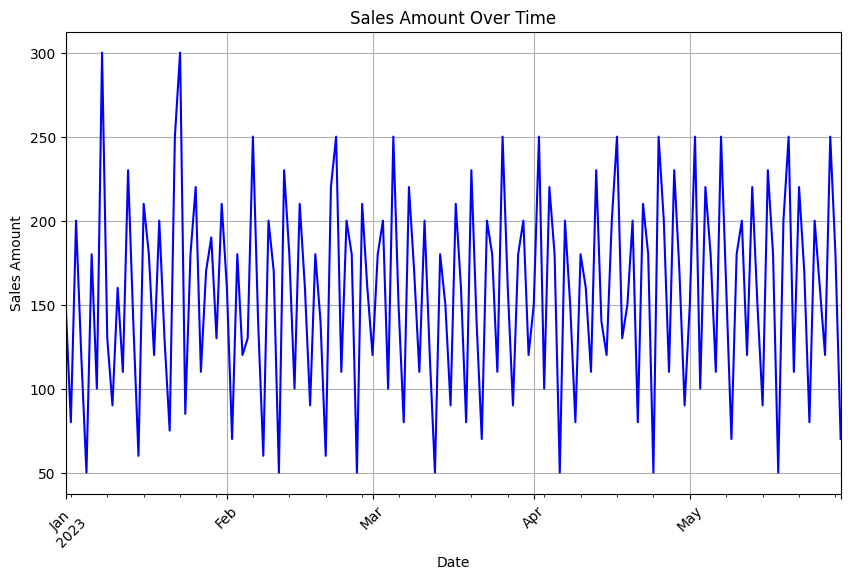

In [4]:
#Sales Amount Over Time 
plt.figure(figsize=(10, 6))
df_grouped = df.groupby('Date')['SalesAmount'].sum()
df_grouped.plot(kind='line', color='b')
plt.title('Sales Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

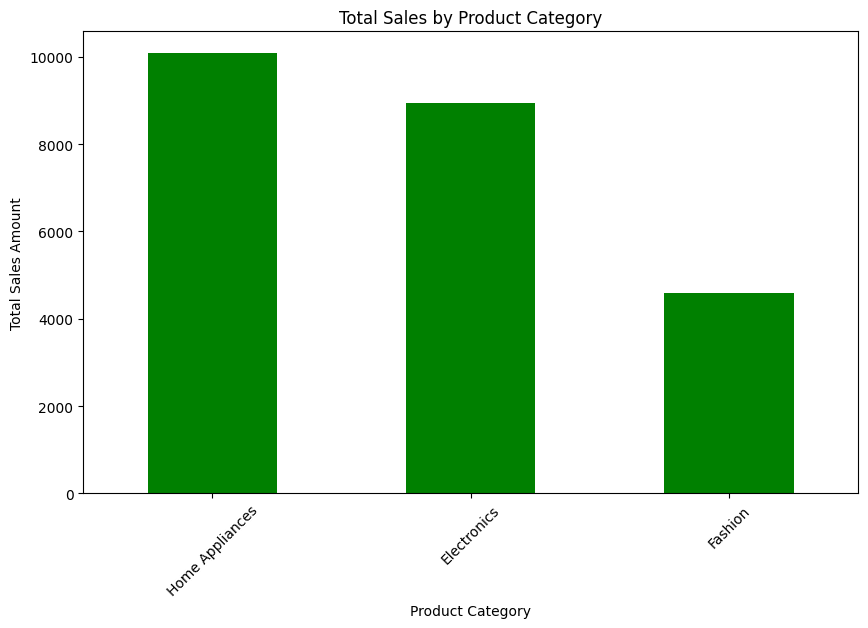

In [5]:
#Total Sales by Product Category
plt.figure(figsize=(10, 6))
category_sales = df.groupby('ProductCategory')['SalesAmount'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', color='g')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

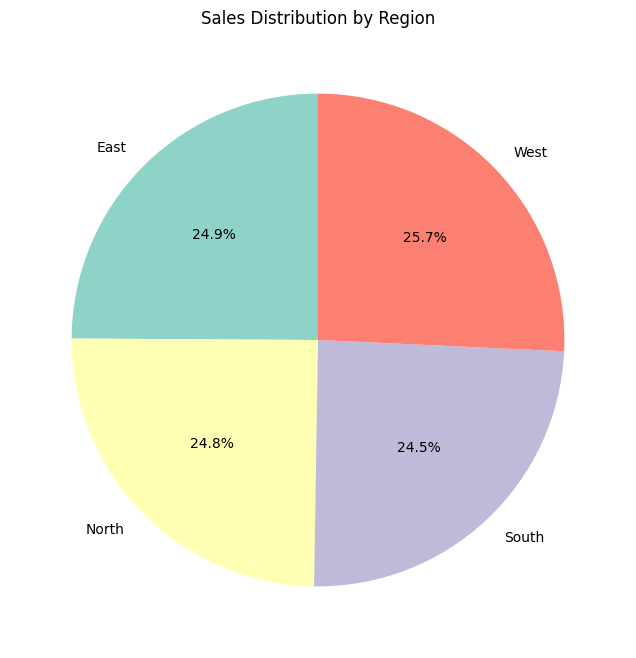

In [6]:

#Sales by Region 
region_sales = df.groupby('Region')['SalesAmount'].sum()
plt.figure(figsize=(8, 8))
region_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(region_sales)))
plt.title('Sales Distribution by Region')
plt.ylabel('')  
plt.show()

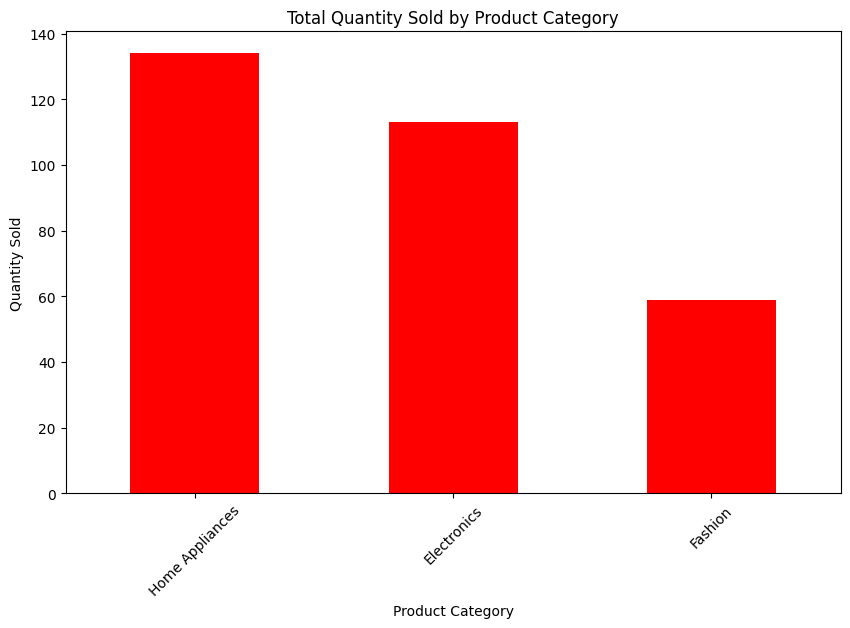

In [7]:
#Sales Quantity by Product Category 
plt.figure(figsize=(10, 6))
category_quantity = df.groupby('ProductCategory')['Quantity'].sum().sort_values(ascending=False)
category_quantity.plot(kind='bar', color='r')
plt.title('Total Quantity Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

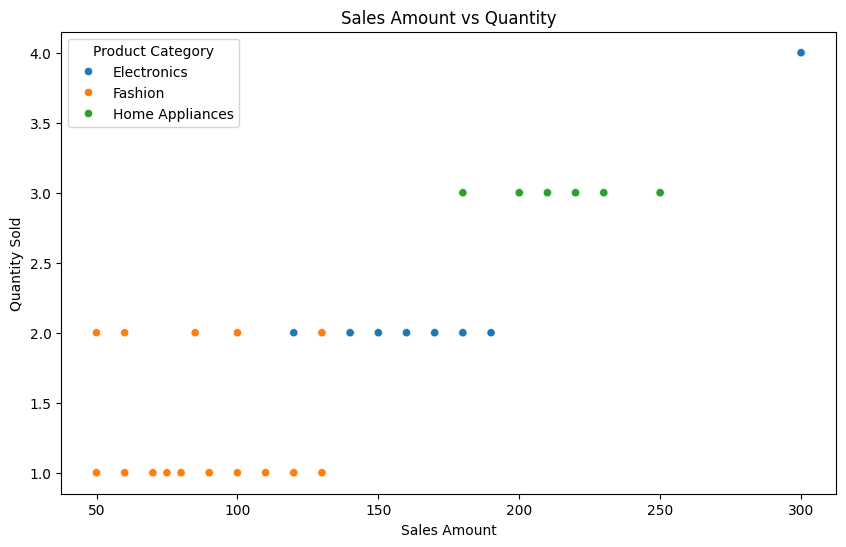

In [8]:
#Sales Amount and Quantity Relationship 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SalesAmount', y='Quantity', data=df, hue='ProductCategory')
plt.title('Sales Amount vs Quantity')
plt.xlabel('Sales Amount')
plt.ylabel('Quantity Sold')
plt.legend(title='Product Category', loc='upper left')
plt.show()

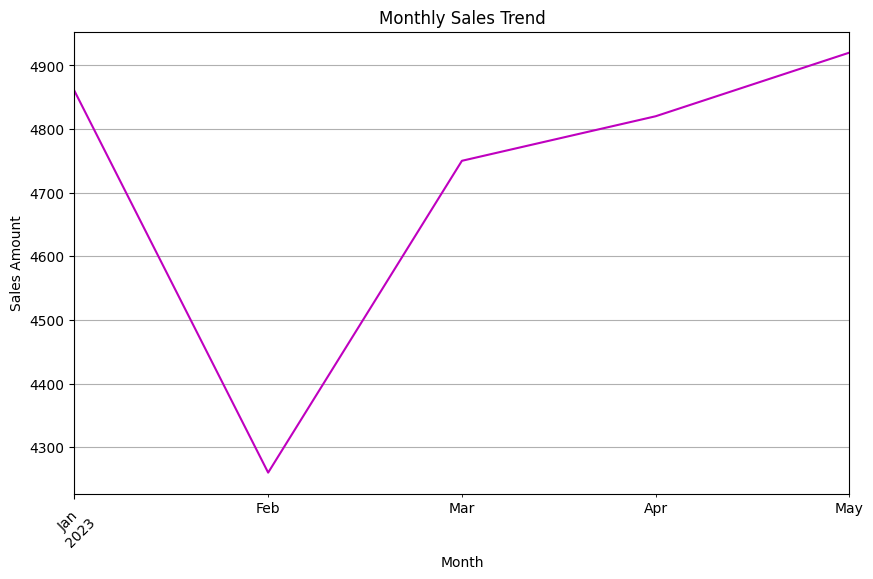

In [9]:
#Monthly Sales Trend
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['SalesAmount'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', color='m')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()